In [1]:
import os, shutil
train_dir = 'train'
validation_dir = 'validation'
test_dir = 'test'

from keras.utils import image_dataset_from_directory

IMG_SIZE = 150

train_dataset = image_dataset_from_directory(train_dir,image_size=(IMG_SIZE, IMG_SIZE),batch_size=32,label_mode='categorical')
validation_dataset = image_dataset_from_directory(validation_dir,image_size=(IMG_SIZE, IMG_SIZE),batch_size=32,label_mode='categorical')
test_dataset = image_dataset_from_directory(test_dir,image_size=(IMG_SIZE, IMG_SIZE),batch_size=32,label_mode='categorical')

2024-06-22 20:55:13.003171: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-22 20:55:14.350233: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 40000 files belonging to 10 classes.


2024-06-22 20:55:21.185400: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-22 20:55:21.696485: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-22 20:55:21.696535: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-22 20:55:21.701517: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-22 20:55:21.701567: I external/local_xla/xla/stream_executor

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [2]:
from tensorflow import keras
model = keras.models.load_model('ModelT_with_Data_Aug.keras')


In [3]:
val_loss, val_acc = model.evaluate(validation_dataset)
print("Validation accuracy: ", val_acc)

2024-06-22 20:55:34.849652: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-06-22 20:55:39.381489: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.38GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - acc: 0.7615 - loss: 0.3361
Validation accuracy:  0.7601000070571899


Carregamos o modelo T com Augmentation 

In [4]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 150, 150,  │          0 │ input_layer_1[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 150, 150)  │          0 │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 150, 150)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 150, 150)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 150, 150,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 150, 150,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 4, 4, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 8192)      │          0 │ vgg16[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │  2,097,408 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │      2,570 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 18,914,646 (72.15 MB)

 Trainable params: 2,099,978 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,099,980 (8.01 MB)

In [5]:
convbase=model.get_layer('vgg16')
convbase.trainable = True

for layer in convbase.layers[:-4]:
    layer.trainable = False

for i, layer in enumerate(convbase.layers):
    print(i, layer.name, layer.trainable)

0 input_layer False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


Congelámos a nossa base convolucional excepto as ultimas 4 camadas

In [11]:
callbacks_list = [
keras.callbacks.ModelCheckpoint(
filepath='ModelT_with_Data_Aug_and_Fine_Tuning_CP_best.keras',
save_best_only=True,
monitor='val_loss',
verbose=0),
]

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=1e-5), metrics=['acc'])


In [14]:
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset,callbacks=callbacks_list)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 118s 90ms/step - acc: 0.6387 - loss: 1.5860 - val_acc: 0.8143 - val_loss: 0.6400
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 112s 89ms/step - acc: 0.7216 - loss: 0.9138 - val_acc: 0.8358 - val_loss: 0.5491
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 112s 89ms/step - acc: 0.7538 - loss: 0.7761 - val_acc: 0.8481 - val_loss: 0.4785
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 113s 90ms/step - acc: 0.7850 - loss: 0.6743 - val_acc: 0.8617 - val_loss: 0.4366
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - acc: 0.8028 - loss: 0.6112 - val_acc: 0.8702 - val_loss: 0.4194
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 110s 88ms/step - acc: 0.8146 - loss: 0.5651 - val_acc: 0.8767 - val_loss: 0.3894
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 109s 87ms/step - acc: 0.8253 - loss: 0.5341 - val_acc: 0.8818 - val_loss: 0.3947
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 109s 87ms/step - acc: 0.8384 - loss: 0.4926 - val_acc: 0.8838 - val_loss: 0.3718
Epoch 9/30
1250/

In [15]:
model.save('ModelT_with_Data_Aug_and_Fine_Tuning.keras')

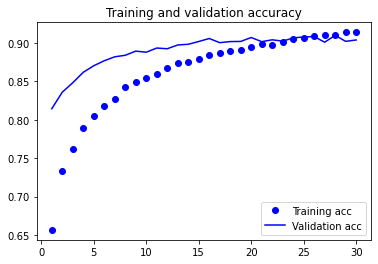

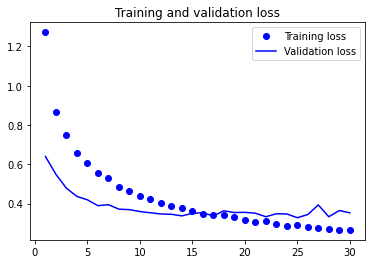

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()